import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing

%matplotlib inline

In [45]:
columns = ['id','age','exp','income','zipcode','family','ccavg','education','mortgage','loan','sec_acc','cd_acc','online','cc']

In [46]:
df = pd.read_csv("bank_loan.csv", header=0, names=columns)

In [47]:
df.head()

,id,age,exp,income,zipcode,family,ccavg,education,mortgage,loan,sec_acc,cd_acc,online,cc
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
id           5000 non-null int64
age          5000 non-null int64
exp          5000 non-null int64
income       5000 non-null int64
zipcode      5000 non-null int64
family       5000 non-null int64
ccavg        5000 non-null float64
education    5000 non-null int64
mortgage     5000 non-null int64
loan         5000 non-null int64
sec_acc      5000 non-null int64
cd_acc       5000 non-null int64
online       5000 non-null int64
cc           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [49]:
# Column descriptions

##	Data Description:								
##									
##	id	Customer ID							
##	age	Customer's age in completed years							
##	experience	#years of professional experience							
##	income	Annual income of the customer ($000)							
##	zipcode	Home Address ZIP code.							
##	family	Family size of the customer							
##	ccavg	Avg. spending on credit cards per month ($000)							
##	education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
##	mortgage	Value of house mortgage if any. ($000)							
##	loan	Did this customer accept the personal loan offered in the last campaign?							
##	sec_acc	Does the customer have a securities account with the bank?							
##	cd_acc	Does the customer have a certificate of deposit (CD) account with the bank?							
##	online	Does the customer use internet banking facilities?							
##	cc	Does the customer use a credit card issued by UniversalBank?							


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
exp,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
zipcode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
ccavg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [51]:
#Dropping id column since it does not add any extra information
df.drop('id',axis=1,inplace=True)

In [52]:
df.zipcode.value_counts().head(10)

94720    169
94305    127
95616    116
90095     71
93106     57
92037     54
93943     54
91320     53
91711     52
94025     52
Name: zipcode, dtype: int64

In [53]:
df.education.value_counts()

1    2096
3    1501
2    1403
Name: education, dtype: int64

In [54]:
df.exp.value_counts().head(10)

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
Name: exp, dtype: int64

In [55]:
df.sec_acc.value_counts()

0    4478
1     522
Name: sec_acc, dtype: int64

In [56]:
df.cd_acc.value_counts()

0    4698
1     302
Name: cd_acc, dtype: int64

In [57]:
df.loan.value_counts()

0    4520
1     480
Name: loan, dtype: int64

In [85]:
### The target class 'loan' is highly imbalanced with lot less people accepting loans than those who don't

### Converting the categorical features into category type

In [58]:
df['loan'] = df.loan.astype('category')
df['zipcode'] = df.zipcode.astype('category')
df['online'] = df.online.astype('category')
df['cc'] = df.cc.astype('category')
df['sec_acc'] = df.sec_acc.astype('category')
df['cd_acc'] = df.cd_acc.astype('category')
df['education'] = df.education.astype('category')

#### Test

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
age          5000 non-null int64
exp          5000 non-null int64
income       5000 non-null int64
zipcode      5000 non-null category
family       5000 non-null int64
ccavg        5000 non-null float64
education    5000 non-null category
mortgage     5000 non-null int64
loan         5000 non-null category
sec_acc      5000 non-null category
cd_acc       5000 non-null category
online       5000 non-null category
cc           5000 non-null category
dtypes: category(7), float64(1), int64(5)
memory usage: 297.8 KB


In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
exp,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
ccavg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


### Replace the negative values in experience feature

In [61]:
df.exp.value_counts().tail(8)

 0     66
 40    57
 41    43
-1     33
-2     15
 42     8
-3      4
 43     3
Name: exp, dtype: int64

#### Replacing the negative values in experience feature with their absolute values becuase this most likely seems like a manual error

In [62]:
df.loc[(df.exp==-1),'exp'] = 1

In [63]:
df.loc[(df.exp==-2),'exp'] = 2

In [64]:
df.loc[(df.exp==-3),'exp'] = 3

#### Test

In [65]:
df.exp.value_counts().tail(10)

31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: exp, dtype: int64

### Distributions of continuous varibles

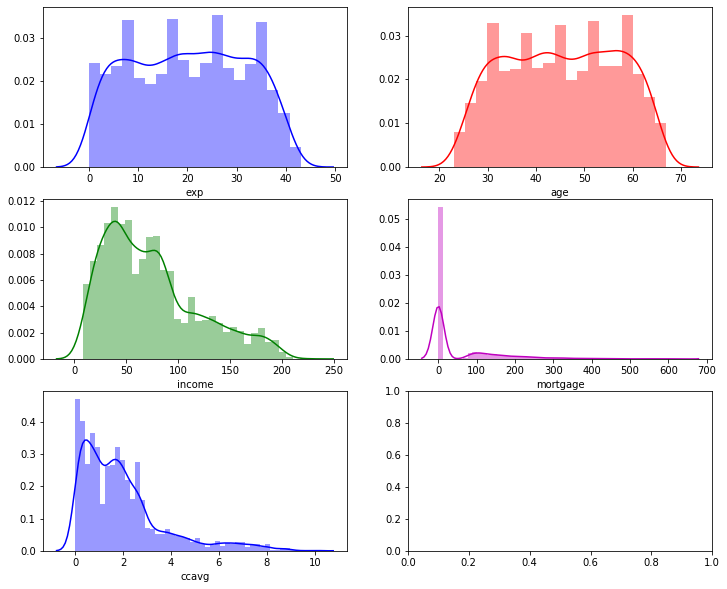

In [66]:
f, axes = plt.subplots(3, 2, figsize=(12, 10))

sns.distplot(df.exp, color="b", ax=axes[0, 0])
sns.distplot(df.age, color="r", ax=axes[0, 1])
sns.distplot(df.income, color="g", ax=axes[1, 0])
sns.distplot(df.mortgage, color="m", ax=axes[1, 1])
sns.distplot(df.ccavg, color="b", ax=axes[2, 0])



#### Distribution of categorical variables

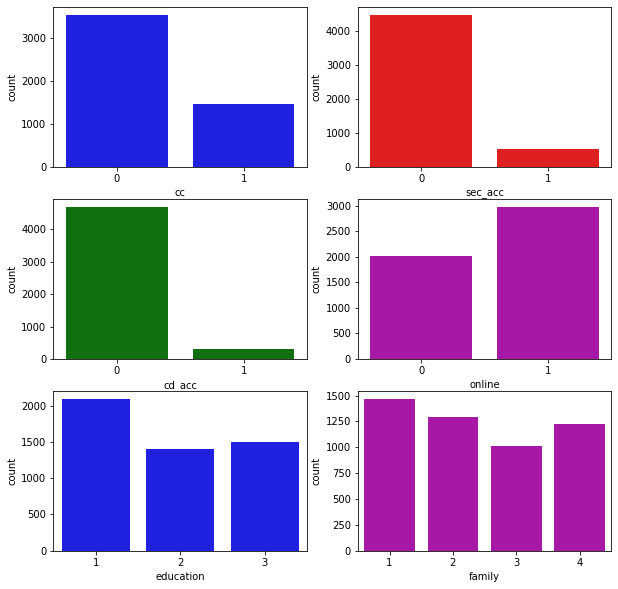

In [67]:
f, axes = plt.subplots(3, 2, figsize=(10, 10))

sns.countplot(df.cc, color="b", ax=axes[0, 0])
sns.countplot(df.sec_acc, color="r", ax=axes[0, 1])
sns.countplot(df.cd_acc, color="g", ax=axes[1, 0])
sns.countplot(df.online, color="m", ax=axes[1, 1])
sns.countplot(df.education, color="b", ax=axes[2, 0])
sns.countplot(df.family, color="m", ax=axes[2, 1])


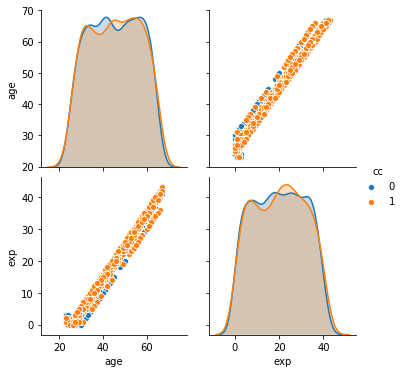

In [68]:
sns.pairplot(data=df[['age','exp','cc']], hue='cc')

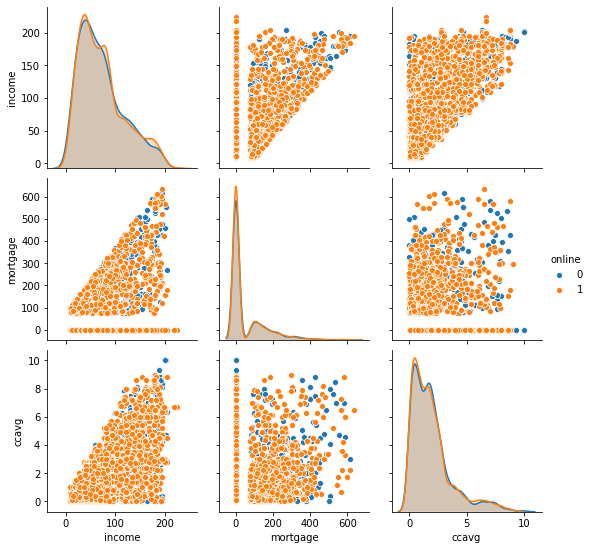

In [95]:
sns.pairplot(data=df[['income','mortgage','online','ccavg']], hue='online')

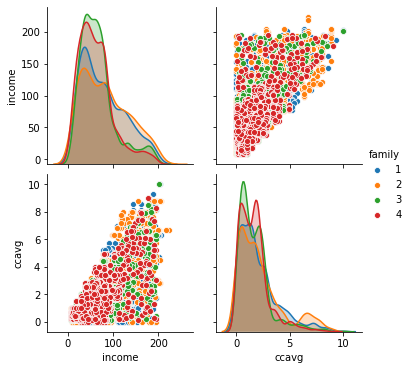

In [70]:
sns.pairplot(data=df[['income','ccavg','family']],hue='family')

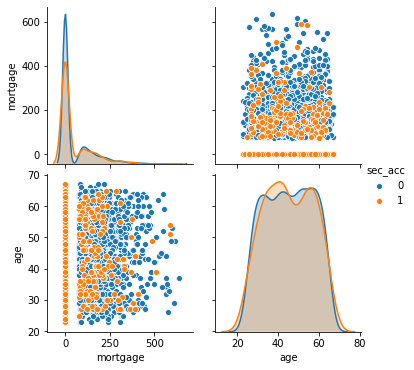

In [71]:
sns.pairplot(data=df[['mortgage','age','sec_acc']],hue='sec_acc')

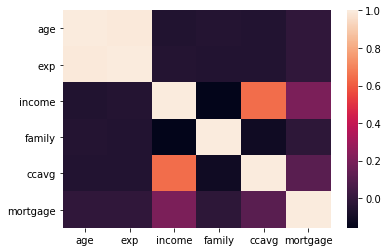

In [72]:
sns.heatmap(df.corr())

'Age' and 'Experience' have the highest corelation of all which is a very natural association.

Another correlation is 'Credit Card avg' and 'income' which is also easily explained. 
Higher the income higher could be the credit card avg and vice versa 

#### Taget column distribution

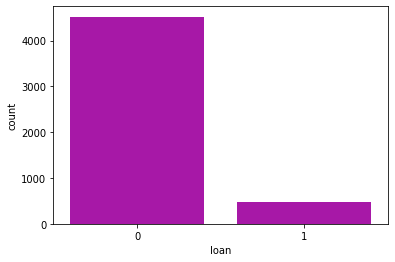

In [73]:
sns.countplot(df.loan, color="m")

#### There are far fewer customers who bought a loan last time than those who did not.

##  Split the data into training and test set in the ratio of 70:30 respectively 

In [74]:
X = df.drop(['zipcode','loan'], axis=1)
y = df['loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### Pre-processing

In [75]:
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries

# scale all the columns of the df. This will produce a numpy array
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

### Logisitc regression model

In [87]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
print("Logistic Regression model accuracy(in %):", model_score*100)

# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_predict))

Logistic Regression model accuracy(in %): 94.53333333333333
[[1330   12]
 [  70   88]]


In [77]:
# summarize the fit of the model
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1342
           1       0.88      0.56      0.68       158

    accuracy                           0.95      1500
   macro avg       0.92      0.77      0.83      1500
weighted avg       0.94      0.95      0.94      1500



In [ ]:
Since we had much higher number of class 0 precision and recall is much better. Class 1 has a very poor recall.

### Naive Bayes model

In [88]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train_scaled, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [89]:
# making predictions on the testing set 
y_pred = gnb.predict(X_test_scaled) 

In [90]:
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 88.86666666666667


In [91]:
print(metrics.confusion_matrix(y_test, y_pred))

[[1239  103]
 [  64   94]]


In [92]:
# summarize the fit of the model
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1342
           1       0.88      0.56      0.68       158

    accuracy                           0.95      1500
   macro avg       0.92      0.77      0.83      1500
weighted avg       0.94      0.95      0.94      1500



Of the two models, both the models do poorly on recall metric and eventually a low f1. Even though the accuracy is high, for an imbalanced target class, what matters is how the models are performing on the class of interest which is class 1. 